# Homework 2

### Due Date: Friday, March 20

### Policy Gradient

In this assignment, we will implement vanilla policy gradient algorithm (REINFORCE) covered in the lecture. You will work on i) a function approximator, ii) computing action, iii) collecting samples, iV) training the agent, V) plotting the resutls. 


***Complete the missing operations and test your implemented algorithm on the Gym environment.***

***Software requirements:***
- Python >= 3.6
- Tensorflow version <= 1.15.3 (1.X version)
- OpenAI Gym

- Training the agent (policy) can take long time. It is recomended to start solving the problems earlier.

- Save any plots you generated in this notebook. The grade will be given based on the plots you showed.



Make sure the packages you installed meet the requirements.

In [1]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [2]:
import gym
gym.__version__

'0.18.0'

## 1.1 Tensorflow Implementation

We will be implementing policy gradient algorithm using Tensorflow 1.X., which simply updates the parameters of policy from obtaining gradient estimates. The core of policy gradient is to design a function approximator, computing actions, collecting samples, and training the policy. In the below cell, you are encouraged to fill in the components that are missing. ***Your tasks*** are 

1. Complete the 'create_model' method to output the mean value for diagonal Guassian policy. Covariance is already defined in the model, so focus on creating neural network model.

2. Complete the 'action_op' method to calculate and return the actions for diagonal Gaussian policy. The applied action should be $\pi(s) = \pi_{\text{mean}}(s) + exp(logstd) * \mathcal{N}(0,1)$

***Hints***:
- Some useful tensorflow classes and methods include: 'tf.exp', 'tf.random_normal'



***IF you are using MAC, please run below box***

In [ ]:
import os
# MAC user only
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import tensorflow as tf
import numpy as np
import os
import ipdb


class PolicyOpt(object):

    def __init__(self, env, linear=False, stochastic=True, hidden_size=32, nonlinearity=tf.nn.relu):
        """Instantiate the policy iteration class.

        This initializes the policy optimization with a set of trainable 
        parameters, and creates a tensorflow session.

        Attributes
        ----------
        env : gym.Env
            the environment that the policy will be trained on
        linear : bool, optional
            specifies whether to use a linear or neural network 
            policy, defaults to False (i.e. Fully-Connected-Neural-Network)
        stochastic : bool, optional
            specifies whether to use a stochastic or deterministic 
            policy, defaults to True
        hidden_size : list of int, optional
            list of hidden layers, with each value corresponding 
            to the number of nodes in that layer 
        nonlinearity : tf.nn.*
            activation nonlinearity
        """
        
        # clear computation graph
        tf.reset_default_graph()
        
        # set a random seed
        tf.set_random_seed(1234)
        
        # start a tensorflow session
        self.sess = tf.Session()
        
        # environment to train on
        self.env = env
        
        # number of elements in the action space
        self.ac_dim = env.action_space.shape[0]
        
        # number of elements in the observation space
        self.obs_dim = env.observation_space.shape[0]

        # actions placeholder
        self.a_t_ph = tf.placeholder(dtype=tf.float32, 
                                     shape=[None, self.ac_dim])
        # state placeholder
        self.s_t_ph = tf.placeholder(dtype=tf.float32, 
                                     shape=[None, self.obs_dim])
        # expected reward placeholder
        self.rew_ph = tf.placeholder(dtype=tf.float32, 
                                     shape=[None])

        # specifies whether the policy is stochastic
        self.stochastic = stochastic

        # policy that the agent executes during training/testing
        self.policy = self.create_model(
            args={
                "num_actions": self.ac_dim,
                "hidden_size": hidden_size,
                "linear": linear,
                "nonlinearity": nonlinearity,
                "stochastic": stochastic,
                "scope": "policy",
            }
        )
        
        # define symbolic action
        self.symbolic_action = self.action_op()

        # initialize all variables
        self.sess.run(tf.global_variables_initializer())

        # create saver to save model variables
        self.saver = tf.train.Saver()

    def create_model(self, args):
        """Create a model for your policy or other components.

        Parameters
        ----------
        args : dict
            model-specific arguments, with keys:
              - "stochastic": True by default
              - "hidden_size": Number of neurons in hidden layer
              - "num_actions" number of output actions
              - "scope": scope of the model

        Returns
        -------
        tf.Variable
            mean actions of the policy
        tf.Variable 
            logstd of the policy actions
        """

#################### Build Your Neural Network Here! ####################        
        #tf.reset_default_graph()
    
        #num_features = 5
        #num_outputs = 1
        #num_hidden = 32
        
        #input_ph = tf.placeholder(tf.float32, [None, num_features])
    
        #input_size = self.obs_dim
        #hidden_size = args["hidden_size"]
        #output_size = args["num_actions"]
        
        #weights_0 = tf.Variable(tf.random_normal([num_features,num_hidden]))
        #bias_0 = tf.Variable(tf.random_normal([num_hidden]))
        #weights_1 = tf.Variable(tf.random_normal([num_hidden,num_hidden]))
        #bias_1 = tf.Variable(tf.random_normal([num_hidden]))
        #weights_2 = tf.Variable(tf.random_normal([num_hidden,num_outputs]))
        #bias_2 = tf.Variable(tf.random_normal([num_outputs]))
        
        #hidden_layer1 = tf.nn.tanh(tf.matmul(input_ph,weights_0)+bias_0)
        #hidden_layer2 = tf.nn.tanh(tf.matmul(hidden_layer1,weights_1)+bias_1)
        
        #output_mean = tf.matmul(hidden_layer2,weights_2)+bias_2
        
        h_layer1=tf.layers.dense(self.s_t_ph, args["hidden_size"], activation=args["nonlinearity"])
        h_layer2=tf.layers.dense(h_layer1, 16, activation=tf.keras.activations.tanh)
        output_mean= tf.layers.dense(h_layer2, args["num_actions"])
        
##########################################################################        

        if args["stochastic"]:
            output_logstd =  tf.get_variable(name="action_logstd",shape=[self.ac_dim],trainable=True)
        else:
            output_logstd = None

        return output_mean, output_logstd
    
    def action_op(self):
        """
        Create a symbolic expression that will be used to compute actions from observations.

        When the policy is stochastic, the action follows 

            a_t = output_mean + exp(output_logstd) * z; z ~ N(0,1)
        """
        if self.stochastic:
            output_mean, output_logstd = self.policy

            #################### Implement a stochastic policy here ####################        
            # Implement a stochastic version of computing actions.       #
            #                                                            #
            # The action in a stochastic policy represented by           #
            # a diagonal Gaussian distribution with mean "M" and log     #
            # standard deviation "logstd" is computed as follows:        #
            #                                                            #
            #     a = M + exp(logstd) * z                                #
            #                                                            #
            # where z is a random normal value, i.e. z ~ N(0,1)          #
            #                                                            #
            # In order to generate numbers from a normal distribution,   #
            # use the `tf.random_normal` function.                       #
            ############################################################################ 
            symbolic_action = output_mean + tf.math.exp(output_logstd)*tf.random_normal([1])
            
        else:
            symbolic_action, _ = self.policy
        
        return symbolic_action

    def compute_action(self, obs):
        """Returns a list of actions for a given observation.

        Parameters
        ----------
        obs : np.ndarray
            observations

        Returns
        -------
        np.ndarray
            actions by the policy for a given observation
        """
        return self.sess.run(self.symbolic_action,feed_dict={self.s_t_ph: obs})

    def rollout(self, s_mean=None, s_std=None):
        """Collect samples from one rollout of the policy.

        Returns
        -------
        dict
            dictionary containing trajectory information for the rollout,
            specifically containing keys for "state", "action", "next_state", "reward", and "done"
        """
        states = []
        next_states = []
        actions = []
        rewards = []
        dones = []

        # start a new rollout by re-setting the environment and collecting the initial state
        state =  self.env.reset()

        steps = 0
        while True:
            steps += 1

            # compute the action given the state
            if s_mean is not None and s_std is not None:
                action = self.compute_action([(state - s_mean) / s_std])
            else:
                action = self.compute_action([state])
            action = action[0]

            # advance the environment once and collect the next state, reward, done, and info parameters from the environment
            next_state, reward, done, info =  self.env.step(action)

            # add to the samples list
            states.append(state)
            actions.append(action)
            next_states.append(next_state)
            rewards.append(reward)
            dones.append(done)

            state = next_state

            # if the environment returns a True for the done parameter,
            # end the rollout before the time horizon is met
            if done or steps > env._max_episode_steps:
                break

        # create the output trajectory
        trajectory = {"state": np.array(states, dtype=np.float32),
                      "reward": np.array(rewards, dtype=np.float32),
                      "action": np.array(actions, dtype=np.float32),
                      "next_state": np.array(next_states, dtype=np.float32),
                      "done": np.array(dones, dtype=np.float32)}

        return trajectory

    def train(self, args):
        """Abstract training method.

        This method will be filled in by algorithm-specific
        training operations in subsequent problems.

        Parameters
        ----------
        args : dict
            algorithm-specific hyperparameters
        """
        raise NotImplementedError



## 1.2 Tensorflow Interpretation

In order to test your implementation of the **stochastic policy**, run the below cell. The task is to interpret the code you implemented in previous section. If you implement correctly, you can see the value_1 and value_2.

***Question: How do you interpret value_1 and value_2 below cell?***


In [3]:
import gym
TEST_ENV = gym.make("Pendulum-v0")

alg = PolicyOpt(TEST_ENV, linear=False)
input_1 = [[0, 1, 2]]
value_1 = alg.sess.run(alg.policy[0], feed_dict={alg.s_t_ph: input_1})
value_2 = alg.compute_action(input_1)

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [70]:
value_1


array([[-0.21664532]], dtype=float32)

Answer:

In [71]:
value_2

array([[-0.46187037]], dtype=float32)

Answer:

## 1.3 Implement Policy Gradient

In this section, we will implement REINFORCE algorithm presented in the lecture. As a review, the objective is optimize the parameters $\theta$ of some policy $\pi_\theta$ so that the expected return

\begin{equation}
J(\theta) = \mathbb{E} \bigg\{ \sum_{t=0}^T \gamma^t r(s_{t},a_{t}) \bigg\}
\end{equation}

is optimized. In this algorithm, this is done by calculating the gradient $\nabla_\theta J$ and applying a gradient descent method to find a better policy.

\begin{equation}
\theta ' = \theta + \alpha \nabla_\theta J(\theta)
\end{equation}

In the lecture, we derive how we compute $\nabla_{\theta} J(\theta)$. We can rewrite our policy gradient as:

\begin{equation}
\nabla_\theta J (\theta) \approx \frac{1}{N} \sum_{i=0}^{N} \bigg( \sum_{t=0}^{T} \nabla_\theta \log \pi_\theta (a_{it} | s_{it}) \bigg) \bigg( \sum_{t=0}^T \gamma^{t}r_i(t) \bigg)
\end{equation}

Finally, taking into account the causality principle discussed in class, we are able to simplifiy the gradient estimate such as:

\begin{equation}
\nabla_\theta J (\theta) \approx \frac{1}{N} \sum_{i=0}^{N} \sum_{t=0}^{T} \nabla_\theta \log \pi_\theta (a_{it} | s_{it}) \sum_{t'=t}^T \gamma^{t'-t}r_i(t')
\end{equation}

You will be implementing final expression in this assignment!



The process of REINFOCE algorithm follows:

1. Collect samples from current policy $\pi_\theta(s)$ by executing rollouts of the environment.
2. Calculate an estimate for the expected return at state $s_t$. 
3. Compute the log-likelihood of each action that was performed by the policy at every given step.
4. Estimate the gradient and update the parameters of policy using gradient-based technique.
5. Repeat steps 1-4 for a number of training iterations.

***Your task*** is to fill out the skeleton code for REINFORCE algorithm,

1. Complete the 'log_likelihoods' method to compute gradient of policy, $\nabla_{\theta}\pi_{\theta}$ for diagonal Guassian policy. 

2. Complete the 'compute_expected_return' method to calculate the reward-to-go, $\sum_{t^{\prime}=t}^{T}$. 



In [4]:
import tensorflow as tf
import numpy as np
import time
import tensorflow_probability as tfp

class REINFORCE(PolicyOpt):

    def train(self, num_iterations=1000, steps_per_iteration=1000, learning_rate=int(1e-4), gamma=0.95, 
              **kwargs):
        """Perform the REINFORE training operation.

        Parameters
        ----------
        num_iterations : int
            number of training iterations
        steps_per_iteration : int
            number of individual samples collected every training iteration
        learning_rate : float
            optimizer learning rate
        gamma : float
            discount rate
        kwargs : dict
            additional arguments

        Returns
        -------
        list of float
            average return per iteration
        """
        # set the discount as an attribute
        self.gamma = gamma
        
        # set the learning rate as an attribute
        self.learning_rate = learning_rate

        # create a symbolic expression to compute the log-likelihoods 
        log_likelihoods = self.log_likelihoods()

        # create a symbolic expression for updating the parameters of your policy
        self.opt, self.opt_baseline = self.define_updates(log_likelihoods)
        
        # initialize all variables
        self.sess.run(tf.global_variables_initializer())


        # average return per training iteration
        ret_per_iteration = []
        
        samples = []
        for i in range(num_iterations):
            
            # collect samples from the current policy
            samples.clear()
            steps_so_far = 0
            while steps_so_far < steps_per_iteration:
                new_samples = self.rollout()
                steps_so_far += new_samples["action"].shape[0]
                samples.append(new_samples)

            # compute the expected returns
            v_s = self.compute_expected_return(samples)

            # compute and apply the gradients
            self.call_updates(log_likelihoods, samples, v_s, **kwargs)

            # compute the average cumulative return per iteration
            average_rew = np.mean([sum(s["reward"]) for s in samples])

            # display iteration statistics
            print("Iteration {} return: {}".format(i, average_rew))
            ret_per_iteration.append(average_rew)

        return ret_per_iteration

    def log_likelihoods(self):
        """Create a tensorflow operation that computes the log-likelihood 
        of each performed action.
        """
        
        output_mean, output_logstd = self.policy

        ##############################################################
        # Create a tf operation to compute the log-likelihood of     #
        # each action that was performed by the policy               #
        #                                                            #
        # The log likelihood in the continuous case where the policy #
        # is expressed by a multivariate gaussian can be computing   #
        # using the tensorflow object:                               #
        #                                                            #
        #    p = tfp.distributions.MultivariateNormalDiag(           #
        #        loc=...,                                            #
        #        scale_diag=...,                                     #
        #    )                                                       #
        #                                                            #
        # This method takes as input a mean (loc) and standard       #
        # deviation (scale_diag), and then can be used to compute    #
        # the log-likelihood of a variable as follows:               #
        #                                                            #
        #    log_likelihoods = p.log_prob(...)                       #
        #                                                            #
        # For this operation, you will want to use placeholders      #
        # created in the __init__ method of problem 1.               #
        ##############################################################

        p = tfp.distributions.MultivariateNormalDiag(loc = output_mean, scale_diag = tf.exp(output_logstd))
        log_likelihoods = p.log_prob(self.a_t_ph)

        return log_likelihoods

    def compute_expected_return(self, samples):
        """Compute the expected return from a given starting state.
        This is done by using the reward-to-go method.

        Parameters
        ----------
        rewards : list of list of float
            a list of N trajectories, with each trajectory contain T 
            returns values (one for each step in the trajectory)

        Returns
        -------
        list of float, or np.ndarray
            expected returns for each step in each trajectory
        """
        rewards = [s["reward"] for s in samples]

        ##############################################################
        # Estimate the expected return from any given starting state #
        # using the reward-to-go method.                             #
        #                                                            #
        # Using this method, the reward is estimated at every step   #
        # of the trajectory as follows:                              #
        #                                                            #
        #   r = sum_{t'=t}^T gamma^(t'-t) * r_{t'}                   #
        #                                                            #
        # where T is the time horizon at t is the index of the       #
        # current reward in the trajectory. For example, for a given #
        # set of rewards r = [1,1,1,1] and discount rate gamma = 1,  #
        # the expected reward-to-go would be:                        #
        #                                                            #
        #   v_s = [4, 3, 2, 1]                                       #
        #                                                            #
        # You will be able to test this in one of the cells below!   #
        ##############################################################
        v_s = [sum(r[t:])*pow(self.gamma,(len(rewards)-t))
              for r in rewards 
                  for t in range(len(r))]
        
        return v_s

    def define_updates(self, log_likelihoods):
        """Create a tensorflow operation to update the parameters of 
        your policy.

        Parameters
        ----------
        log_likelihoods : tf.Operation
            the symbolic expression you created to estimate the log 
            likelihood of a set of actions

        Returns
        -------
        tf.Operation
            a tensorflow operation for computing and applying the 
            gradients to the parameters of the policy
        None
            the second component is used in problem 2.b, please ignore 
            for this problem
        """

        loss = - tf.reduce_mean(tf.multiply(log_likelihoods, self.rew_ph))
        opt = tf.train.AdamOptimizer(self.learning_rate).minimize(loss)

        return opt, None

    def call_updates(self, log_likelihoods, samples, v_s, **kwargs):
        """Apply the gradient update methods in a tensorflow session.

        Parameters
        ----------
        log_likelihoods: tf.Operation
            the symbolic expression you created to estimate the log 
            likelihood of a set of actions
        samples : list of dict
            a list of N trajectories, with each trajectory containing 
            a dictionary of trajectory data (see self.rollout)
        v_s : list of float, or np.ndarray
            the estimated expected returns from your
            `comput_expected_return` function 
        kwargs : dict
            additional arguments (used in question 3)
        """
        # concatenate the states
        states = np.concatenate([s["state"] for s in samples])

        # concatenate the actions
        actions = np.concatenate([s["action"] for s in samples])

        # execute the optimization step
        self.sess.run(self.opt, feed_dict={self.s_t_ph: states,
                                           self.a_t_ph: actions,
                                           self.rew_ph: v_s})

Check your 'log_likelihoods' method by running below cell:

In [5]:
alg = REINFORCE(TEST_ENV, stochastic=True)

log_likelihoods = alg.log_likelihoods()

# collect a sample output for a given input state
input_s = [[0, 0, 0], [0, 1, 2], [1, 2, 3]]
input_a = [[0], [1], [2]]

# Check
computed = alg.sess.run(log_likelihoods, feed_dict={alg.a_t_ph: input_a, alg.s_t_ph: input_s})

Test your 'compute_expected_return' by running below cell:

In [6]:
# 1. Test the non-normalized case
alg = REINFORCE(TEST_ENV, stochastic=True)
alg.gamma = 1.0
    
input_1 = [{"reward": [1, 1, 1, 1]},
           {"reward": [1, 1, 1, 1]}]
vs_1 = alg.compute_expected_return(samples=input_1)
ans_1 = np.array([4, 3, 2, 1, 4, 3, 2, 1])

if np.linalg.norm(vs_1 - ans_1) < 1e-3:
    print('Great job!')
else:
    print('Check your implementation (compute_expected_return)')

    

Great job!


## 1.4 Testing your algorithm

When you are ready, test your policy gradient algorithms on the *Pendulum-v0* environment in the cell below. *Pendulum-v0* environment is similar to *off-shore wind power*, the goal here is to maintain the Pendulum is upright using control input. The best policy should get around -200 scores. ***Your task*** is to run your REINFORCE algorithm and plot the result!


In [7]:
# set this number as 1 for testing your algorithm, and 3 for plotting
NUM_TRIALS = 3

# ===========================================================================
# Do not modify below line
# ===========================================================================

# we will test the algorithms on the Pendulum-v0 gym environment
import gym
env = gym.make("Pendulum-v0")

# train on the REINFORCE algorithm
import numpy as np
r = []
for i in range(NUM_TRIALS):
    print("\n==== Training Run {} ====".format(i))
    alg = REINFORCE(env, stochastic=True)
    res = alg.train(learning_rate=0.005, gamma=0.95, num_iterations=500, steps_per_iteration=15000)
    r.append(np.array(res))
    alg = None

# save results
np.savetxt("InvertedPendulum_results.csv", np.array(r), delimiter=",")


==== Training Run 0 ====
Iteration 0 return: -1234.862544769179
Iteration 1 return: -1162.706375949177
Iteration 2 return: -1172.8364774990828
Iteration 3 return: -1171.0515913174177
Iteration 4 return: -1136.8094572469345
Iteration 5 return: -1128.1778327328122
Iteration 6 return: -1115.6009244163706
Iteration 7 return: -1119.6915077390709
Iteration 8 return: -1141.532752873109
Iteration 9 return: -1107.1671449399087
Iteration 10 return: -1090.2987643332965
Iteration 11 return: -1109.5068113305017
Iteration 12 return: -1192.702745981415
Iteration 13 return: -1174.8269704695047
Iteration 14 return: -1152.9712499903019
Iteration 15 return: -1162.1181033191053
Iteration 16 return: -1212.0955882141056
Iteration 17 return: -1202.9422519534144
Iteration 18 return: -1210.4331442372502
Iteration 19 return: -1221.7858985392502
Iteration 20 return: -1162.9648878746605
Iteration 21 return: -1211.6262236886782
Iteration 22 return: -1191.0119750148135
Iteration 23 return: -1212.708428773928
Itera

Iteration 201 return: -368.68562502394855
Iteration 202 return: -381.92808176754806
Iteration 203 return: -348.6782770415198
Iteration 204 return: -400.21377848846714
Iteration 205 return: -321.0563348724692
Iteration 206 return: -370.19477328389536
Iteration 207 return: -368.73836611040406
Iteration 208 return: -325.21457208130846
Iteration 209 return: -387.4123496683339
Iteration 210 return: -328.2222510610265
Iteration 211 return: -324.13732010441015
Iteration 212 return: -417.18611014688173
Iteration 213 return: -356.7537902806416
Iteration 214 return: -355.88868802855393
Iteration 215 return: -357.6259437135402
Iteration 216 return: -322.3323747754114
Iteration 217 return: -285.9733953090823
Iteration 218 return: -300.3070891265956
Iteration 219 return: -291.30546605309536
Iteration 220 return: -315.2614944991116
Iteration 221 return: -319.7793013161759
Iteration 222 return: -323.6133306523491
Iteration 223 return: -315.43756705150093
Iteration 224 return: -376.45429532268935
Iter

Iteration 399 return: -253.2232433321924
Iteration 400 return: -228.00189138262664
Iteration 401 return: -258.51612646211225
Iteration 402 return: -278.33578533986866
Iteration 403 return: -255.28214890925884
Iteration 404 return: -275.8151430828642
Iteration 405 return: -232.19886339931782
Iteration 406 return: -218.7433711350148
Iteration 407 return: -214.62935962962487
Iteration 408 return: -232.52414050153558
Iteration 409 return: -277.6288219000673
Iteration 410 return: -242.14091852698718
Iteration 411 return: -254.53500057585345
Iteration 412 return: -234.8582260928391
Iteration 413 return: -285.1943729224992
Iteration 414 return: -235.4335226524578
Iteration 415 return: -253.007595010371
Iteration 416 return: -221.67585669655202
Iteration 417 return: -212.25776150466652
Iteration 418 return: -234.62916147460672
Iteration 419 return: -243.23592688309188
Iteration 420 return: -228.1257552525598
Iteration 421 return: -238.44559847891477
Iteration 422 return: -192.07295089646914
It

Iteration 98 return: -904.0626694597281
Iteration 99 return: -943.8378830328965
Iteration 100 return: -928.9994319464771
Iteration 101 return: -940.8421430023294
Iteration 102 return: -900.9862872079434
Iteration 103 return: -933.0556610265235
Iteration 104 return: -910.5695989605815
Iteration 105 return: -883.1927881569337
Iteration 106 return: -864.9538672024462
Iteration 107 return: -890.6639817448919
Iteration 108 return: -879.513845791098
Iteration 109 return: -880.6216769847057
Iteration 110 return: -900.7235368407735
Iteration 111 return: -858.6663132492406
Iteration 112 return: -863.9319843981593
Iteration 113 return: -852.8557519010051
Iteration 114 return: -827.0661499481896
Iteration 115 return: -841.5026632126537
Iteration 116 return: -885.3602268292848
Iteration 117 return: -865.2997956792304
Iteration 118 return: -912.5869002889796
Iteration 119 return: -919.2875949739152
Iteration 120 return: -938.6104695696325
Iteration 121 return: -959.064881522777
Iteration 122 return

Iteration 297 return: -318.319788068633
Iteration 298 return: -299.5343315063381
Iteration 299 return: -287.4305347570793
Iteration 300 return: -330.2748850856549
Iteration 301 return: -288.8762225707604
Iteration 302 return: -306.70944740038345
Iteration 303 return: -284.795008122612
Iteration 304 return: -317.82437427288585
Iteration 305 return: -320.74790425175365
Iteration 306 return: -305.4363255222299
Iteration 307 return: -254.4642216396216
Iteration 308 return: -277.52459940238515
Iteration 309 return: -337.52895932221725
Iteration 310 return: -271.58641121131376
Iteration 311 return: -250.79577747461298
Iteration 312 return: -334.53159159394056
Iteration 313 return: -289.59518610350625
Iteration 314 return: -260.33106875274024
Iteration 315 return: -268.0881013462674
Iteration 316 return: -297.64941093076766
Iteration 317 return: -320.23122419493023
Iteration 318 return: -283.8256620397838
Iteration 319 return: -309.1845923374647
Iteration 320 return: -245.92797148689803
Itera

Iteration 495 return: -258.6431487987465
Iteration 496 return: -296.93244887217014
Iteration 497 return: -239.92268320831198
Iteration 498 return: -265.0215683966035
Iteration 499 return: -212.5364492910422

==== Training Run 2 ====
Iteration 0 return: -1238.6859812290145
Iteration 1 return: -1181.109269495836
Iteration 2 return: -1159.8605166777566
Iteration 3 return: -1127.359273056447
Iteration 4 return: -1103.5993678851084
Iteration 5 return: -1156.796607780798
Iteration 6 return: -1112.4653501148662
Iteration 7 return: -1083.6556616836042
Iteration 8 return: -1128.6198201289253
Iteration 9 return: -1124.038422212377
Iteration 10 return: -1097.698132553529
Iteration 11 return: -1103.8586079684521
Iteration 12 return: -1113.9673074931131
Iteration 13 return: -1118.3556823529302
Iteration 14 return: -1169.5227067088833
Iteration 15 return: -1129.804554883189
Iteration 16 return: -1147.2183240419813
Iteration 17 return: -1205.5017101381968
Iteration 18 return: -1126.7852374455247
Iter

Iteration 196 return: -308.37755873428074
Iteration 197 return: -306.5760046456142
Iteration 198 return: -265.988371137263
Iteration 199 return: -305.9460064102259
Iteration 200 return: -292.0688768927617
Iteration 201 return: -342.75261350554223
Iteration 202 return: -295.4889931093562
Iteration 203 return: -276.77111391432254
Iteration 204 return: -289.5029037947121
Iteration 205 return: -285.9935411209352
Iteration 206 return: -326.3824606395891
Iteration 207 return: -312.23131965569473
Iteration 208 return: -328.7811947030584
Iteration 209 return: -309.0109724241911
Iteration 210 return: -278.28464869886966
Iteration 211 return: -259.6774688883394
Iteration 212 return: -308.37032272453024
Iteration 213 return: -303.5852887847351
Iteration 214 return: -295.94324794185457
Iteration 215 return: -315.4254239168078
Iteration 216 return: -312.35764222728227
Iteration 217 return: -324.3731871317237
Iteration 218 return: -261.2702925348091
Iteration 219 return: -282.20938968308917
Iteratio

Iteration 394 return: -241.88280255107946
Iteration 395 return: -261.27599880048314
Iteration 396 return: -257.49585613121485
Iteration 397 return: -244.45801054129134
Iteration 398 return: -239.3333142190416
Iteration 399 return: -248.44918809876756
Iteration 400 return: -254.2536877196253
Iteration 401 return: -247.67188467767778
Iteration 402 return: -233.72514220663282
Iteration 403 return: -280.1350617074586
Iteration 404 return: -247.9498939658062
Iteration 405 return: -231.36387556099842
Iteration 406 return: -244.35225489681974
Iteration 407 return: -251.7805324697768
Iteration 408 return: -264.78518680395166
Iteration 409 return: -250.99412827528522
Iteration 410 return: -238.3123950624046
Iteration 411 return: -218.94742187542434
Iteration 412 return: -247.6038587514448
Iteration 413 return: -280.77094832152443
Iteration 414 return: -274.58798573952106
Iteration 415 return: -247.46533379256886
Iteration 416 return: -256.5525268651677
Iteration 417 return: -260.56673283929706


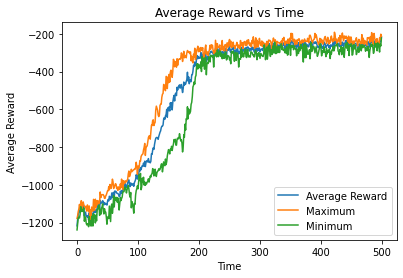

In [9]:
# collect saved results
import numpy as np
r1 = np.genfromtxt("InvertedPendulum_results.csv", delimiter=",")
all_results = [r1]
labels = ["REINFORCE"]

##############################################################
# Plot your Policy Gradient results below
##############################################################
import matplotlib.pyplot as plt
arrays = [np.array(x) for x in r1]
mean = [np.mean(y) for y in zip(*arrays)]
maximum = [np.max(y) for y in zip(*arrays) ]
minimum = [np.min(y) for y in zip(*arrays) ]

plt.plot(mean, label ="Average Reward")
plt.plot(maximum, label ="Maximum")
plt.plot(minimum, label ="Minimum")

plt.xlabel('Time')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Time')
plt.legend()